In [ ]:
#                                                           Task 1: Credit Scoring Model
#                                                      CodeAlpha Machine Learning Internship

In [ ]:
# Load the data
import pandas as pd

df = pd.read_csv('../data/credit_data.csv')
print(df.head())
df.info()
print(df.isnull().sum())

   age  income   debt  late_payments  loan_amount  approved
0   59   60818   5486              8        24097         0
1   49   65525   8335              9        15395         0
2   35   39830  21364              8        21241         1
3   63   37429  37259              8        32696         0
4   28   26893  23576              5         9944         0


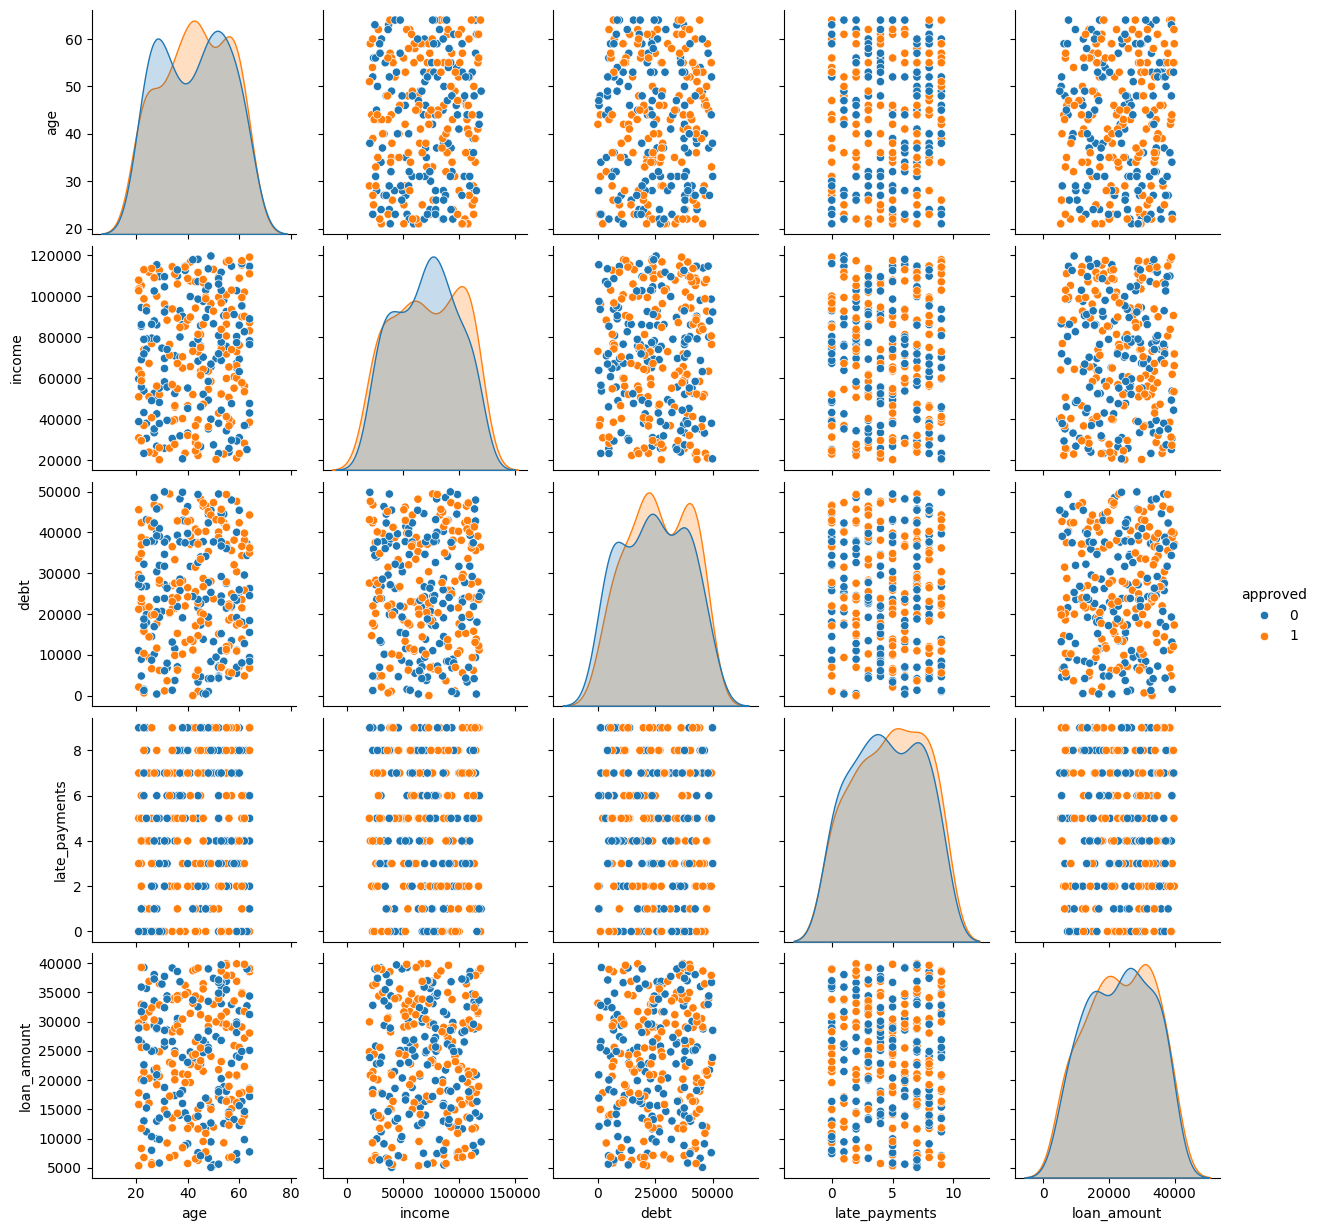

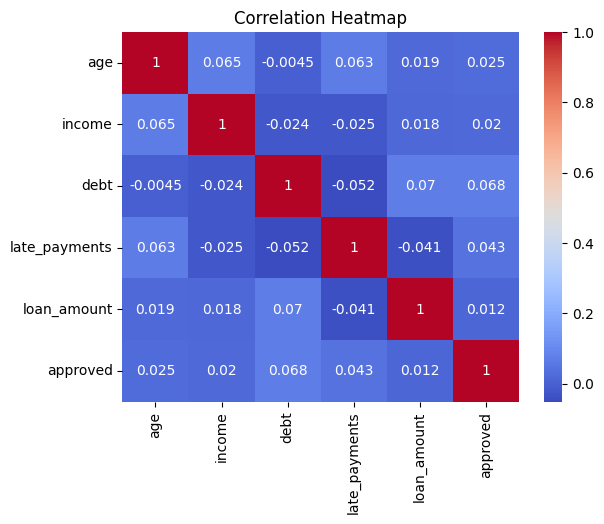

In [ ]:
### Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="approved")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Feature and label split
X = df.drop('approved', axis=1)
y = df['approved']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Prediction & Evaluation
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score)

y_pred = model.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.58        40
           1       0.38      0.65      0.48        20

    accuracy                           0.53        60
   macro avg       0.56      0.56      0.53        60
weighted avg       0.61      0.53      0.54        60

✅ Accuracy: 0.5333333333333333


In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

['../models/credit_model.pkl']

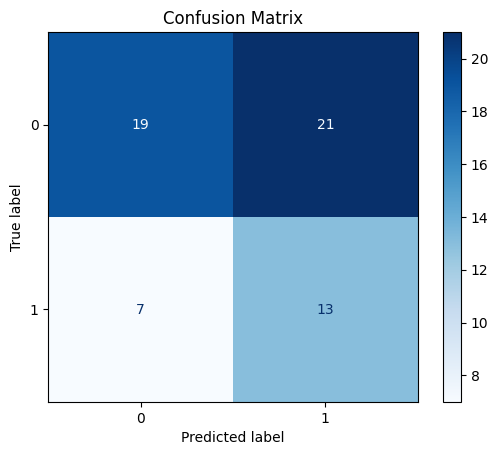

In [ ]:
# Save the model
import joblib

joblib.dump(model, '../models/credit_model.pkl')

In [ ]:
# Feature Importance
importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()